<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assesment-of-COVID-19-Cases-by-Using-Ehler’s-Fisher-Transform" data-toc-modified-id="Assesment-of-COVID-19-Cases-by-Using-Ehler’s-Fisher-Transform-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assesment of COVID-19 Cases by Using Ehler’s Fisher Transform</a></span><ul class="toc-item"><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Read Data</a></span></li><li><span><a href="#Settings-and-Methods" data-toc-modified-id="Settings-and-Methods-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Settings and Methods</a></span><ul class="toc-item"><li><span><a href="#Various-Outputs" data-toc-modified-id="Various-Outputs-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Various Outputs</a></span></li></ul></li></ul></li><li><span><a href="#Plots" data-toc-modified-id="Plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#Plot-New-Cases-and-New-Deaths" data-toc-modified-id="Plot-New-Cases-and-New-Deaths-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plot New Cases and New Deaths</a></span></li><li><span><a href="#Plot-EFT" data-toc-modified-id="Plot-EFT-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plot EFT</a></span></li><li><span><a href="#Plot-Time-versus-Number-of-Extremum-Points-of-EFT" data-toc-modified-id="Plot-Time-versus-Number-of-Extremum-Points-of-EFT-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot Time versus Number of Extremum Points of EFT</a></span></li><li><span><a href="#Plot-Number-of-Extremum-Points-of-EFT-versus-Time" data-toc-modified-id="Plot-Number-of-Extremum-Points-of-EFT-versus-Time-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Plot Number of Extremum Points of EFT versus Time</a></span></li><li><span><a href="#Plot-OHLC-Data" data-toc-modified-id="Plot-OHLC-Data-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Plot OHLC Data</a></span></li></ul></li><li><span><a href="#References:" data-toc-modified-id="References:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>References:</a></span><ul class="toc-item"><li><span><a href="#Data-Used-In-This-Work" data-toc-modified-id="Data-Used-In-This-Work-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Used In This Work</a></span></li><li><span><a href="#COVID-19-Data-Repository-by-the-Center-for-Systems-Science-and-Engineering-(CSSE)-at-Johns-Hopkins-University" data-toc-modified-id="COVID-19-Data-Repository-by-the-Center-for-Systems-Science-and-Engineering-(CSSE)-at-Johns-Hopkins-University-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University</a></span></li><li><span><a href="#Groups-&amp;-People" data-toc-modified-id="Groups-&amp;-People-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Groups &amp; People</a></span></li><li><span><a href="#Websites" data-toc-modified-id="Websites-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Websites</a></span></li><li><span><a href="#Articles" data-toc-modified-id="Articles-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Articles</a></span></li></ul></li></ul></div>

# Assesment of COVID-19 Cases by Using Ehler’s Fisher Transform

## Read Data

In [1]:
"""
!pip install plotly, kaleido, sympy, TA
"""
# Import Libraries
from datetime import datetime
from finta import TA
# Initiate rendering Latex, HTML, Math etc.
from IPython.display import display, HTML, Latex, Math
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.optimize import curve_fit
import sympy as sy

# matplotlib settings.
register_matplotlib_converters()
%matplotlib inline
# %matplotlib notebook
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 600
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
# pandas settings.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read Data for Cases, Deaths Vaccinations and Recoveries etc.
datasrc = {1:"Hopkins", 2:"owid", 3:"local"}[2]
file_path = {"owid":'https://covid.ourworldindata.org/data/owid-covid-data.csv',
             "Hopkins":'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
             "local":'owid-covid-data.csv'}[datasrc]
output_path = "output/"
today = datetime.now().strftime('%Y_%m_%d')
df = pd.read_csv(file_path)

## Settings and Methods

In [2]:
"""
Date: 2023-02-20
                              1   2   3   4   5   6   7   8   9   10
====================================================================                              
Ordered by Max Total Cases:  USA,IND,FRA,DEU,BRA,JPN,KOR,ITA,GBR,RUS
Ordered by Max Total Deaths: USA,BRA,IND,RUS,MEX,PER,GBR,ITA,DEU,FRA
"""
country = {1:"USA",2:"IND",3:"FRA",4:"DEU",5:"BRA",6:"KOR",7:"GBR",8:"ITA",9:"JPN",
           10:"RUS",11:"TUR"}[1]
country_name = {'AUS':'Australia',
                'BRA':'Brazil',
                'CHN':'China','DEU':'Germany','DNK':'Denmark',
                'FIN':'Finland','FRA':'France',
                'GBR':'United Kingdom','IND':'India',
                'IDN':'Indonesia',
                'ISR':'Isreal','ITA':'Italy','JPN':'Japan',
                'KEN':'Kenya','KOR':'S.Korea','MEX':'Mexico',
                'NER':'Niger',
                'PER':'Peru','QAT':'Qatar','RUS':'Russia',
                'SSD':'South Sudan','SWE':'Sweden',
                'TUR':'Türkiye','URY':'Uruguay','USA':'USA'}[country]
dfcovid = df.copy() # Copy all data to a new dataframe.
dfcovid = dfcovid[dfcovid["iso_code"]==(country)]    # Select a desired country.
dfcovid = dfcovid.sort_index(axis=0, ascending=True) # Original data is given in the reverse order of date.

# Create new index from year, month, day columns. ohlc candlesticks need this.
pcolumn_labels = ["year","month","day"]
times = dfcovid['date']
"""
OLD CODE
<ipython-input-11-e1bdf4bec523>:12: FutureWarning:
The pandas.datetime class is deprecated and will be removed from pandas in a future version. 
Import from datetime module instead.

newtimes = [pd.datetime(pd.to_datetime(times.iloc[i]).year,
                        pd.to_datetime(times.iloc[i]).month,
                        pd.to_datetime(times.iloc[i]).day) for i in range(0, len(times))]
"""
newtimes = [datetime.strptime(times.iloc[i], '%Y-%m-%d') for i in range(0, len(times))]
dfcovid['newtimes'] = newtimes
dfcovid.index = newtimes

class sets:
    """
    Settings class.
    """
    def __init__(self):
        pass
    
    # Simulation settings.
    """
    new_cases: New confirmed cases of COVID-19. 
               Counts can include probable cases, where reported. 
               In rare cases where our source reports a negative daily change due to a data correction, 
               we set this metric to NA.
    new_cases_smoothed: New confirmed cases of COVID-19 (7-day smoothed). 
                        Counts can include probable cases, where reported.
    df_type: 1:cases, 2:deaths, 3:TPR, 4:cumsum_cases, 5:cumsum_deaths, 
             6:cumsum_vaccinations, 7:death_per_case
    """
    df_type = {1:1,2:2,7:7}[7]
    bsmoothed = {False:1, True:2}[True]
    column_cases  = {1:'new_cases',  2:'new_cases_smoothed'}[bsmoothed]
    column_deaths = {1:'new_deaths', 2:'new_deaths_smoothed'}[bsmoothed]
    column_vaccinations = {1:'new_vaccinations', 2:'new_vaccinations_smoothed'}[bsmoothed]
    column_tests  = {1:"new_tests", 2:"new_tests_smoothed"}[bsmoothed]
    dropinf = True
    sample_time = {3:'3d', 7:'7d'}[3]    # Approximate incubation time.
    file_name = {1:"_cases", 2:"_deaths", 3:"_cases_TPR",
                 4:"_cumsum_cases", 5:"_cumsum_deaths", 6:"_cumsum_vacs",
                 7:"_death_per_case"}[df_type]
    
    # Indicator settings.
    # Ehler's Fisher Transform
    fisher_shift = 1
    fisher_period = 14

def get_crossovers(df):
    """
    Returns minimum, maximum crossover points of a dataframe including two lines (line and signal).
    [max_times, min_times, dfmaxs, dfmins] = get_crossovers(dfEFT)
    """
    #mask_mins = (df['line'].gt(df['signal'])) & (df['line'].shift().lt(df['signal'].shift()))
    mask_maxs = (df['line'] < df['signal']) & (df['line'].shift() > df['signal'].shift())
    mask_mins = (df['line'] > df['signal']) & (df['line'].shift() < df['signal'].shift())
    idx_maxs = df[mask_maxs].index.tolist()
    idx_mins = df[mask_mins].index.tolist()
    max_times = list([str(i).replace(' 00:00:00', '') for i in idx_maxs])
    min_times = list([str(i).replace(' 00:00:00', '') for i in idx_mins])
    return(max_times, min_times, df[mask_maxs], df[mask_mins])
    
def get_EFT(df):
    """
    Get Ehler's Fisher Transform (EFT) from finta package.   
    """
    line = pd.DataFrame(TA.FISH(df, period=sets.fisher_period)) # default period=10
    # For constructing a signal line, shift forward line data which is a previous value of itself.
    signal = line.shift(sets.fisher_shift)
    res = pd.merge(line, signal, left_index=True, right_index=True)
    # or res = line.join(signal, how='left', lsuffix='_left', rsuffix='_right')
    res.columns = ['line','signal']
    return(res)

def plot_fisher(line, signal, ptime=sets.sample_time):
    """
    Plots line and signal lines in colors green and red, respectively.
    """
    fig = plt.figure(); 
    ax = fig.add_subplot(1, 1, 1)
    ax.grid(color='grey', linestyle='-.', linewidth=0.2, alpha=1)
    ax.plot(line.index,   line.values,   color="green")
    ax.plot(signal.index, signal.values, color="red")
    ax.set_title(ptime, fontsize=10)
    
def get_fit_func(type_):
    """
    Returns a fit function.
    """
    if type_ == "lin":
        def lin_func(x, a, b):
            return a*x + b
        return lin_func
    
    elif type_ == "poly":
        def poly_func(x, a, b, c):
            return a*x**2 + b*x + c
        return poly_func
    
    elif type_ == "exp":
        def exp_func(x, a, b, c):
            return a*np.exp(b*x) + c
        return exp_func

# Test Positive Rate (TPR) (Scrucca 2021).
dfcovid["TPR"] = dfcovid[sets.column_cases] / dfcovid[sets.column_tests]
# dfcovid["TPR"].replace([np.inf, -np.inf], np.nan) # Convert inf to nan and than remove nans.
# dfcovid["TPR"].dropna(inplace=True)
dfTPR_cases = dfcovid["TPR"].resample(sets.sample_time).ohlc()

# Fill dataframes with 'new' daily data.
dfcumsum_cases = dfcovid[sets.column_cases].cumsum().resample(sets.sample_time).ohlc()
dfcumsum_deaths = dfcovid[sets.column_deaths].cumsum().resample(sets.sample_time).ohlc()
dfcumsum_vaccinations = dfcovid[sets.column_vaccinations].cumsum().resample(sets.sample_time).ohlc()
dfohlc_cases  = dfcovid[sets.column_cases].resample(sets.sample_time).ohlc()
dfohlc_deaths = dfcovid[sets.column_deaths].resample(sets.sample_time).ohlc()
dfohlc_death_per_case = (dfcovid[sets.column_deaths]/dfcovid[sets.column_cases]).resample(sets.sample_time).ohlc()
dfohlc_vaccinations = dfcovid[sets.column_vaccinations].resample(sets.sample_time).ohlc()
dfohlc = {1:dfohlc_cases, 2:dfohlc_deaths, 3:dfTPR_cases,
          4:dfcumsum_cases, 5:dfcumsum_deaths ,6:dfcumsum_vaccinations,
          7:dfohlc_death_per_case}[sets.df_type]

# Ehler's Fisher Trasformation.
dfEFT = {1:get_EFT(dfohlc_cases), 2:get_EFT(dfohlc_deaths), 3:get_EFT(dfTPR_cases),
         4:get_EFT(dfcumsum_cases), 5:get_EFT(dfcumsum_deaths), 6:get_EFT(dfcumsum_vaccinations),
         7:get_EFT(dfohlc_death_per_case)}[sets.df_type]

# Stochastic Momentum Index (SMI) from finta package.
df_cases_smi_K = pd.DataFrame( TA.STOCH(dfohlc_cases, period=14))
df_cases_smi_D = pd.DataFrame(TA.STOCHD(dfohlc_cases, period=14))

# Detecting times where EFT line crosses signal.
[max_times_cases,  min_times_cases,  dfmaxs_cases,  dfmins_cases ] = get_crossovers(get_EFT(dfohlc_cases ))
[max_times_deaths, min_times_deaths, dfmaxs_deaths, dfmins_deaths] = get_crossovers(get_EFT(dfohlc_deaths))
[max_times_death_per_case, min_times_death_per_case, dfmaxs_death_per_case, dfmins_death_per_case] = get_crossovers(get_EFT(dfohlc_death_per_case))

# Save data files.
dfEFT.to_csv(output_path+today+"_"+country+sets.file_name+"_EFT.csv", sep='\t', encoding='utf-8')
dfmaxs_cases.to_csv( output_path+country+"_cases_maxs.csv",  sep='\t', encoding='utf-8')
dfmaxs_deaths.to_csv(output_path+country+"_deaths_maxs.csv", sep='\t', encoding='utf-8')
dfmaxs_death_per_case.to_csv(output_path+country+"_death_per_case_maxs.csv", sep='\t', encoding='utf-8')
dfmins_cases.to_csv( output_path+country+"_cases_mins.csv",  sep='\t', encoding='utf-8')
dfmins_deaths.to_csv(output_path+country+"_deaths_mins.csv", sep='\t', encoding='utf-8')
dfmins_death_per_case.to_csv(output_path+country+"_death_per_case_mins.csv", sep='\t', encoding='utf-8')

### Various Outputs

In [3]:
dfcovid[-5:]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,newtimes,TPR
2023-02-15,USA,North America,United States,2023-02-15,103013294.0,87176.0,36678.143,1115702.0,575.0,325.286,304511.921,257.696,108.422,3298.065,1.700,0.962,NaN,3008.0,8.892,23684.0,70.011,NaN,NaN,26125.0,77.227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN,2023-02-15,NaN
2023-02-16,USA,North America,United States,2023-02-16,103072568.0,59274.0,33488.143,1116773.0,1071.0,342.143,304687.138,175.217,98.992,3301.231,3.166,1.011,NaN,2984.0,8.821,23281.0,68.820,NaN,NaN,26095.0,77.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN,2023-02-16,NaN
2023-02-17,USA,North America,United States,2023-02-17,103121205.0,48637.0,38606.571,1117482.0,709.0,429.143,304830.911,143.773,114.123,3303.327,2.096,1.269,NaN,2954.0,8.732,22994.0,67.971,NaN,NaN,26013.0,76.896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN,2023-02-17,NaN
2023-02-18,USA,North America,United States,2023-02-18,103123281.0,2076.0,38291.571,1117497.0,15.0,427.000,304837.048,6.137,113.192,3303.371,0.044,1.262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN,2023-02-18,NaN
2023-02-19,USA,North America,United States,2023-02-19,103124043.0,762.0,38044.571,1117497.0,NaN,NaN,304839.300,2.253,112.461,3303.371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN,2023-02-19,NaN


In [ ]:
dfcovid['new_cases'].cumsum().tail(3)

In [ ]:
dfEFT[['line','signal']];

In [ ]:
dfcovid[["TPR", sets.column_cases, sets.column_tests, 'new_vaccinations']];

In [ ]:
dfcovid.columns;

In [ ]:
display(dfohlc.iloc[0:10],
        dfohlc.head(10),
        dfohlc.tail())

# Plots

## Plot New Cases and New Deaths

<AxesSubplot:xlabel='date'>

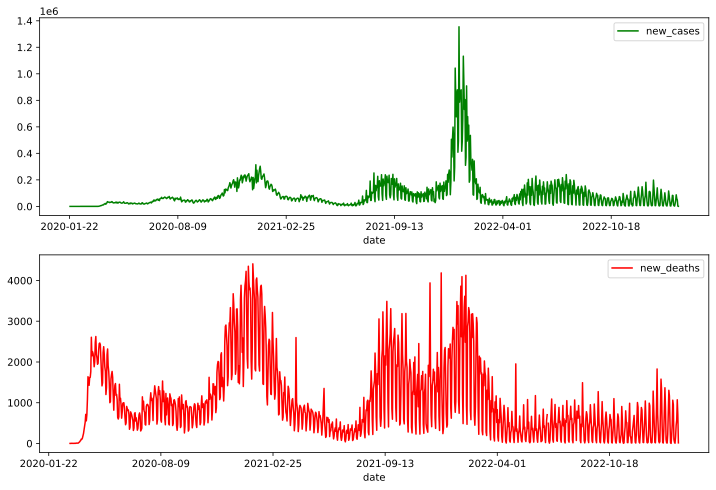

In [4]:
fig = plt.figure() # Create matplotlib figure
ax1 = fig.add_subplot(2,1,1) # Create matplotlib axes
ax2 = fig.add_subplot(2,1,2) # Create matplotlib axes
dfcovid.plot(x='date', y='new_cases',  ax=ax1, logy=0, color=['g'])
dfcovid.plot(x='date', y='new_deaths', ax=ax2, logy=0, color=['r'])

## Plot EFT

In [11]:
# Plot, Create traces
fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=[0, 0.02][0])
fig.add_trace(go.Candlestick(x=dfohlc.index,
                             open=dfohlc['open'],
                             high=dfohlc['high'],
                             low=dfohlc['low'],
                             close=dfohlc['close'],
                             name=str(sets.sample_time)+' OHLC'),
             row=1, col=1)
fig.add_trace(go.Scatter(x=dfEFT.index, 
                         y=dfEFT['line'].values,
                         mode='lines', name='EFT line',
                         line=dict(color='green', width=1.2)),
             row=2, col=1)
fig.add_trace(go.Scatter(x=dfEFT.index,
                         y=dfEFT['signal'].values,
                         mode='lines', name='EFT signal',
                         line=dict(color='red', width=1.2)),
             row=2, col=1) # mode='lines+markers'

# Plot a vertical line for each EFT upward crossover.
if sets.df_type == 1:
    min_times = min_times_cases 
elif sets.df_type == 2:
    min_times = min_times_deaths
elif sets.df_type == 7:
    min_times = min_times_death_per_case
else:
    min_times = min_times_cases
    
for idate in min_times:
    fig.add_vline(x=idate, line_width=0.5, line_dash="dash", line_color="blue")

fig.update_xaxes(title_text="", row=1, col=1, rangeslider_visible=False)
fig.update_xaxes(title_text="Time", row=2, col=1, rangeslider_visible=False)
fig.update_yaxes(title_text={1:"New Cases", 2:"New Deaths", 3:"TPR",
                             4:"Cum Sum of Cases", 5:"Cum Sum of Deaths", 6:"Cum Sum of Vacs",
                             7:"New Deaths/New Cases"}[sets.df_type], row=1, col=1)
fig.update_yaxes(title_text={1:"EFT of New Cases", 2:"EFT of New Deaths", 3:"EFT of TPR",
                             4:"EFT(Cum Cases)", 5:"EFT(Cum Deaths)", 6:"EFT(Cum Vacs)",
                             7:"EFT of New Deaths/New Cases"}[sets.df_type], row=2, col=1)
fig.update_layout(height=500, width=800) # title_text="Covid-19"
#fig.update_layout(paper_bgcolor='white', plot_bgcolor='white')
#fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False)
fig.update_layout(title_text=country_name, title_x=0.5, title_y=0.95)
fig.update_layout(legend=dict(x=0.85,y=1,traceorder="normal"))
fig.update_layout(margin=dict(l=0, r=5, t=5, b=0)) # Tight layout.
fig.show()

# Save plot file
fig.write_image(output_path+today+"_"+country+sets.file_name+"_EFT.pdf")
fig.write_image(output_path+today+"_"+country+sets.file_name+"_EFT.svg")

# Alternative EFT plot.
#plot_fisher(dfEFT['line'], dfEFT['signal'])

<AxesSubplot:>

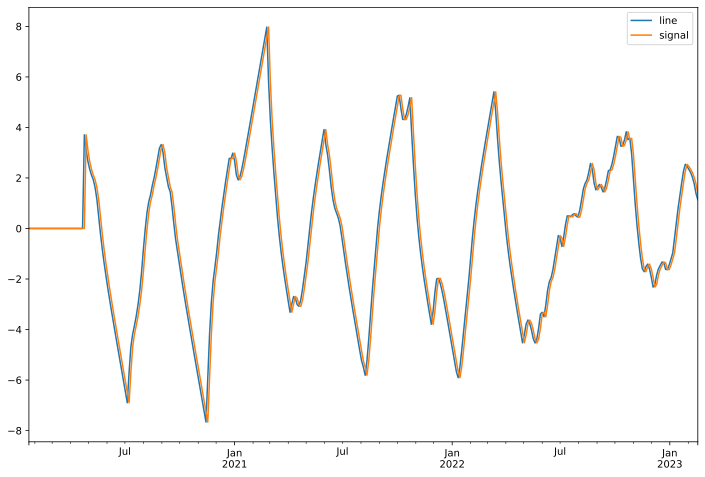

In [6]:
"""
dfEFT['line'].plot(style='g-')
dfEFT['signal'].plot(style="r-")
dfEFT['signal'].shift().plot(style="b-")
"""
dfEFT[['line','signal']].plot()

## Plot Time versus Number of Extremum Points of EFT

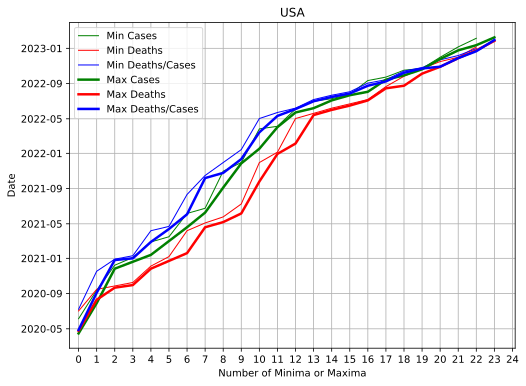

In [7]:
import math
# Create a figure of size 8x6 inches, 300 dots per inch.
plt.figure(figsize=(8, 6), dpi=300)

# Create a new subplot from a grid of 1x1.
plt.subplot(1, 1, 1)
ptype = {1:"line", 2:"points"}[1]

# Use integer multiple of 2 as ticks in the x-axis.
import matplotlib.ticker as mticker
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
#plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

if ptype == "line":
    plt.plot( dfmins_cases.index, color="green", linewidth=1.0, linestyle="-", label="Min Cases" )
    plt.plot(dfmins_deaths.index, color="red",   linewidth=1.0, linestyle="-", label="Min Deaths")
    plt.plot(dfmins_death_per_case.index, color="blue",  linewidth=1.0, linestyle="-", label="Min Deaths/Cases")
    
    plt.plot(dfmaxs_cases.index, color="green", linewidth=2.5, linestyle="-", label="Max Cases" )
    plt.plot(dfmaxs_deaths.index, color="red",   linewidth=2.5, linestyle="-", label="Max Deaths")
    plt.plot(dfmaxs_death_per_case.index, color="blue",  linewidth=2.5, linestyle="-", label="Max Deaths/Cases")
elif ptype == "points":
    plt.plot( dfmins_cases.index, color="green", label="Min Cases" , marker="v", linestyle="None")
    plt.plot(dfmins_deaths.index, color="red",   label="Min Deaths", marker="v", linestyle="None")
    plt.plot(dfmins_death_per_case.index, color="blue",  label="Min Deaths/Cases", marker="v", linestyle="None")
    
    plt.plot(dfmaxs_cases.index, color="green", label="Max Cases" , marker="^", linestyle="None")
    plt.plot(dfmaxs_deaths.index, color="red",   label="Max Deaths", marker="^", linestyle="None")
    plt.plot(dfmaxs_death_per_case.index, color="blue",  label="Max Deaths/Cases", marker="^", linestyle="None")

plt.title(label=country_name)    
plt.xlabel("Number of Minima or Maxima"); plt.ylabel("Date");
plt.xlim(-0.5, None)
plt.legend(loc='upper left')
plt.grid()

# Save plot files.
plt.savefig(output_path+today+"_"+country+sets.file_name+"_minmax.pdf",format="pdf",dpi=600,bbox_inches="tight")
plt.savefig(output_path+today+"_"+country+sets.file_name+"_minmax.svg",format="svg",dpi=600,bbox_inches="tight")
plt.show()

## Plot Number of Extremum Points of EFT versus Time

Fitted Parameters: 2.134e-05 -1.983e-04 1.130e+00


'Fitted Function:'

2.13430312289657e-5*x**2 - 0.000198329296055109*x + 1.13024868357633

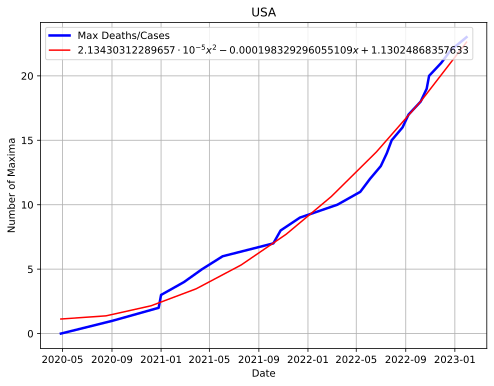

In [8]:
fit_func_type = {1:"lin", 2:"poly", 3:"exp"}[2]
df_type    = {1:"cases", 2:"deaths", 3:"death_per_case"}[3]
min_max    = {1:"min", 2:"max"}[2]
df_min_max = {"cases": {"min":dfmins_cases,  "max":dfmaxs_cases},
              "deaths":{"min":dfmins_deaths, "max":dfmaxs_deaths},
              "death_per_case":{"min":dfmins_death_per_case, 
                                "max":dfmaxs_death_per_case}}[df_type][min_max]
label_legend = {"cases":{"min":"Min Cases",  "max":"Max Cases"},
                "deaths":{"min":"Min Deaths","max":"Max Deaths"},
                "death_per_case":{"min":"Min Deaths/Cases", 
                                  "max":"Max Deaths/Cases"}}[df_type][min_max]
label_y    = {"min":"Minima", "max":"Maxima"}[min_max]

# Define the X and Y data arrays
x_data = df_min_max.index
y_data = list(range(len(df_min_max.index)))

# Convert DatetimeArray to numerical format
x_num = (x_data - x_data[0]).days

# Use the curve_fit function to fit the data to the desired function
popt, pcov = curve_fit(get_fit_func(fit_func_type), x_num, y_data)

# Create a new array of X values for the fitted curve
x_fit_num = np.linspace(0, (x_num[-1] - x_num[0]), 10)
x_fit = x_data[0] + pd.to_timedelta(x_fit_num, unit='D')
     
# Evaluate the fitted function for the new X values
y_fit = get_fit_func(fit_func_type)(x_fit_num, *popt)
print(  "Fitted Parameters:", *["{:.3e}".format(i) for i in popt])
display("Fitted Function:", get_fit_func(fit_func_type)(sy.S('x'), *popt))
label_fit = sy.latex(get_fit_func(fit_func_type)(sy.S('x'), *popt))

# Create a figure of size 8x6 inches, 300 dots per inch
plt.figure(figsize=(8, 6), dpi=300)
# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)
plt.plot(df_min_max.index, list(range(len(df_min_max.index))),
         color="blue",  linewidth=2.5, linestyle="-", label=label_legend)
plt.plot(x_fit, y_fit, color="red", label=r"$"+label_fit+"$")
plt.title(label=country_name)    
plt.xlabel("Date"); plt.ylabel(f"Number of {label_y}");
plt.legend(loc='upper left')
plt.grid()

# Save plot file
plt.savefig(output_path+today+"_"+country+sets.file_name+"_"+min_max+"_fitted.pdf",format="pdf",dpi=600,bbox_inches="tight")
plt.savefig(output_path+today+"_"+country+sets.file_name+"_"+min_max+"_fitted.svg",format="svg",dpi=600,bbox_inches="tight")
plt.show()

In [9]:
print(f"len(min_times_cases)={len(min_times_cases)}")
print(f"len(min_times_deaths)={len(min_times_deaths)}")
print("EFT indicator minima of cases=", min_times_cases)
print("EFT indicator minima of deaths=", min_times_deaths)
print("EFT indicator minima of deaths per cases=", min_times_death_per_case)
dtime = []
for i in range(len(dfmins_deaths.index)):
    try:
        dtime.append(str(dfmins_deaths.index[i]-dfmins_cases.index[i])[0:-9])
    except:
        pass
print("Difference between minima of cases and minima of deaths=", dtime)

len(min_times_cases)=23
len(min_times_deaths)=23
EFT indicator minima of cases= ['2020-06-05', '2020-09-12', '2020-12-08', '2021-01-04', '2021-02-27', '2021-03-17', '2021-06-06', '2021-06-24', '2021-10-31', '2021-11-30', '2022-03-27', '2022-04-05', '2022-06-04', '2022-07-01', '2022-07-10', '2022-07-25', '2022-09-11', '2022-09-23', '2022-10-17', '2022-10-23', '2022-12-01', '2023-01-06', '2023-02-05']
EFT indicator minima of deaths= ['2020-07-02', '2020-09-15', '2020-09-27', '2020-10-09', '2020-12-05', '2021-01-07', '2021-04-07', '2021-05-04', '2021-05-25', '2021-07-09', '2021-11-30', '2022-01-05', '2022-05-02', '2022-05-20', '2022-06-07', '2022-06-22', '2022-07-07', '2022-08-21', '2022-09-26', '2022-10-23', '2022-11-16', '2022-12-01', '2023-01-06']
EFT indicator minima of deaths per cases= ['2020-07-08', '2020-11-17', '2020-12-29', '2021-01-10', '2021-04-07', '2021-04-22', '2021-08-11', '2021-10-16', '2021-11-30', '2022-01-14', '2022-05-02', '2022-05-23', '2022-06-07', '2022-07-07', '20

## Plot OHLC Data

In [10]:
df_type = 1
dfohlc = {1:dfohlc_cases, 2:dfohlc_deaths, 7:dfohlc_death_per_case}[df_type]

# Plot OHLC data
fig = go.Figure(data=go.Candlestick(x=dfohlc.index,
                                    open=dfohlc['open'],
                                    high=dfohlc['high'],
                                    low=dfohlc['low'],
                                    close=dfohlc['close']))
fig.update_xaxes(title_text="Time", rangeslider_visible=True)
fig.update_yaxes(title_text={1:"New Cases",2:"New Deaths",7:"New Deaths/Cases"}[df_type])
fig.update_layout(title_text=country_name, title_x=0.5, title_y=0.95)
fig.update_layout(height=500, width=800) # title_text="Covid-19"
fig.update_layout(margin=dict(l=0, r=5, t=5, b=0)) # Tight layout.
fig.show()

# References:

## Data Used In This Work

- https://covid.ourworldindata.org/data/owid-covid-data.csv

Alternatives
- https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv
- https://github.com/owid/covid-19-data/tree/master/public/data/ \
This data have new_cases, new_deaths, new_vaccinations columns and their smoothed versions separately.

## COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University

- https://github.com/CSSEGISandData/COVID-19

- https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv \
This data have cumulative sum of cases and deaths.


## Groups & People
- Emma B. Hodcroft, https://scholar.google.com/citations?user=ZaupG3YAAAAJ&hl=en
- Emma B. Hodcroft, 2021, "CoVariants: SARS-CoV-2 Mutations and Variants of Interest." https://covariants.org/

## Websites
- https://covariants.org/per-country
- https://www.kaggle.com/jcyzag/covid19-lockdown-dates-by-country
- https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction

## Articles

- Scrucca, L. (2021). A COVINDEX based on a GAM beta regression model with an application to the COVID-19 pandemic in Italy. arXiv:2104.01344 [stat]. [online] Available at: http://arxiv.org/abs/2104.01344

- Zaki, N. and Mohamed, E.A. (2021). The estimations of the COVID-19 incubation period: A scoping reviews of the literature. Journal of Infection and Public Health, [online] 14(5), pp.638–646. doi:https://doi.org/10.1016/j.jiph.2021.01.019
"The incubation period for the virus is a mean of 7.8 days, with a median of 5.01 days, which falls into the ranges proposed by the WHO (0-14 days) and the ECDC (2-12 days)."